In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/sai/Documents/great lakes/New batch/New folder/DSE-Aug20-SLC-BLR-Feb8-11/US_Heart_Patients.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.sample(frac=1,random_state=4).reset_index(drop=True)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df=df.fillna(method='ffill')

In [6]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
y=df['TenYearCHD']
x=df.drop('TenYearCHD',axis=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [10]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [11]:
from sklearn.tree import export_graphviz
from IPython.display import Image

In [12]:
!pip install pydotplus

In [13]:
import pydotplus

In [14]:
#conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
#pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_train)
y_train_prob=dtc.predict_proba(x_train)[:,1]
print(y_train_pred)
print(y_train_prob)


[0 0 1 ... 0 0 0]
[0. 0. 1. ... 0. 0. 0.]


In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

In [20]:
print('train - confusion matrix : ','\n',confusion_matrix(y_train,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y_train,y_train_pred))
print('train - AUC : ', roc_auc_score(y_train,y_train_prob))

train - confusion matrix :  
 [[2519    0]
 [   0  449]]
train - accuracy score :  
 1.0
train - AUC :  1.0


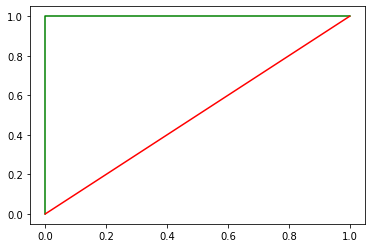

In [21]:
fpr,tpr,thresholds= roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr,'g')
plt.plot(fpr,fpr,'r')
plt.show()

In [22]:
y_test_pred=dtc.predict(x_test)
y_test_prob=dtc.predict_proba(x_test)[:,1]
print(y_test_pred)
print(y_test_prob)
print('train - confusion matrix : ','\n',confusion_matrix(y_test,y_test_pred))
print('train - accuracy score : ','\n', accuracy_score(y_test,y_test_pred))
print('train - AUC : ', roc_auc_score(y_test,y_test_prob))

[0 0 0 ... 0 0 0]
[0. 0. 0. ... 0. 0. 0.]
train - confusion matrix :  
 [[916 161]
 [150  45]]
train - accuracy score :  
 0.7555031446540881
train - AUC :  0.5406399542889794


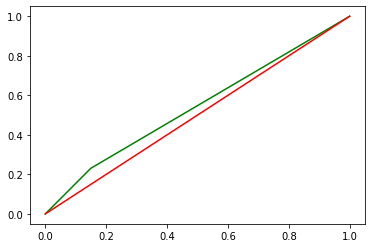

In [23]:
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,'g')
plt.plot(fpr,fpr,'r')
plt.show()

### hyper parameter tuning

In [24]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [25]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

dtc= DecisionTreeClassifier()
params={'max_depth':[2,4,6],'min_samples_split':[10,20,40] }

gsearch=GridSearchCV(estimator=dtc,param_grid=params,scoring='roc_auc',cv=3,return_train_score=True)
print(gsearch.fit(x,y))
print(gsearch.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6],
                         'min_samples_split': [10, 20, 40]},
             return_train_score=True, scoring='roc_auc')
{'max_depth': 6, 'min_samples_split': 40}


In [26]:
dtc= DecisionTreeClassifier()
params={'max_depth':[4,6,8,10,12],'min_samples_split':[20,40,60,80,100] }

gsearch=GridSearchCV(estimator=dtc,param_grid=params,scoring='roc_auc',cv=3,return_train_score=True)
print(gsearch.fit(x,y))
print(gsearch.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [20, 40, 60, 80, 100]},
             return_train_score=True, scoring='roc_auc')
{'max_depth': 6, 'min_samples_split': 80}


In [27]:
cv=gsearch.cv_results_
pd.DataFrame(cv)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007600,2.638385e-03,0.001052,0.001487,4,20,"{'max_depth': 4, 'min_samples_split': 20}",0.678498,0.668103,0.687912,0.678171,0.008090,7,0.729971,0.720604,0.702422,0.717666,0.011437
1,0.005331,3.769277e-03,0.002664,0.003768,4,40,"{'max_depth': 4, 'min_samples_split': 40}",0.678498,0.668103,0.687912,0.678171,0.008090,7,0.729971,0.720604,0.702422,0.717666,0.011437
2,0.002665,3.769277e-03,0.005330,0.003769,4,60,"{'max_depth': 4, 'min_samples_split': 60}",0.678498,0.668103,0.687912,0.678171,0.008090,7,0.729971,0.720604,0.702422,0.717666,0.011437
3,0.008482,6.891853e-04,0.000000,0.000000,4,80,"{'max_depth': 4, 'min_samples_split': 80}",0.678498,0.668115,0.687912,0.678175,0.008085,5,0.729971,0.720119,0.702422,0.717504,0.011398
4,0.007994,1.857014e-06,0.005331,0.003770,4,100,"{'max_depth': 4, 'min_samples_split': 100}",0.678498,0.668115,0.687912,0.678175,0.008085,5,0.729971,0.720119,0.702422,0.717504,0.011398
5,0.007994,2.854813e-05,0.007995,0.000002,6,20,"{'max_depth': 6, 'min_samples_split': 20}",0.683387,0.670602,0.671328,0.675106,0.005863,10,0.767775,0.773461,0.742665,0.761300,0.013380
6,0.009460,1.434493e-03,0.001495,0.001057,6,40,"{'max_depth': 6, 'min_samples_split': 40}",0.691285,0.672338,0.678617,0.680747,0.007880,4,0.765523,0.768577,0.740169,0.758089,0.012733
7,0.008011,2.158299e-05,0.005327,0.003767,6,60,"{'max_depth': 6, 'min_samples_split': 60}",0.690826,0.672991,0.678617,0.680811,0.007445,3,0.765523,0.764099,0.739188,0.756270,0.012093
8,0.007993,3.421950e-06,0.000000,0.000000,6,80,"{'max_depth': 6, 'min_samples_split': 80}",0.691402,0.674721,0.677371,0.681165,0.007319,1,0.765039,0.761521,0.736772,0.754444,0.012579
9,0.008353,5.146606e-04,0.002668,0.003773,6,100,"{'max_depth': 6, 'min_samples_split': 100}",0.690548,0.675126,0.677371,0.681015,0.006803,2,0.764246,0.761018,0.736772,0.754012,0.012262


In [28]:
dtc= DecisionTreeClassifier()
params={'max_depth':[6,8,10],'min_samples_split':[60,80,100] }

gsearch=GridSearchCV(estimator=dtc,param_grid=params,scoring='roc_auc',cv=3,return_train_score=True)
print(gsearch.fit(x,y))
print("best parameters are : ",gsearch.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_split': [60, 80, 100]},
             return_train_score=True, scoring='roc_auc')
best parameters are :  {'max_depth': 6, 'min_samples_split': 80}


In [29]:
cv=gsearch.cv_results_
pd.DataFrame(cv)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.013330,0.003731,0.000000,0.000000,6,60,"{'max_depth': 6, 'min_samples_split': 60}",0.690826,0.672991,0.678617,0.680811,0.007445,3,0.765523,0.764099,0.739188,0.756270,0.012093
1,0.010659,0.003762,0.002666,0.003771,6,80,"{'max_depth': 6, 'min_samples_split': 80}",0.691861,0.674721,0.677371,0.681318,0.007533,1,0.765039,0.761521,0.736772,0.754444,0.012579
2,0.011089,0.003531,0.003103,0.004389,6,100,"{'max_depth': 6, 'min_samples_split': 100}",0.691008,0.675126,0.677371,0.681169,0.007018,2,0.764246,0.761018,0.736772,0.754012,0.012262
3,0.013324,0.003768,0.000000,0.000000,8,60,"{'max_depth': 8, 'min_samples_split': 60}",0.677774,0.653144,0.674921,0.668613,0.011000,6,0.804624,0.800097,0.772637,0.792453,0.014133
4,0.008442,0.000630,0.002668,0.003773,8,80,"{'max_depth': 8, 'min_samples_split': 80}",0.679304,0.655899,0.675471,0.670225,0.010250,5,0.796128,0.791765,0.768353,0.785416,0.012196
5,0.007993,0.000003,0.000000,0.000000,8,100,"{'max_depth': 8, 'min_samples_split': 100}",0.678397,0.662259,0.677591,0.672749,0.007424,4,0.795206,0.788042,0.763925,0.782391,0.013381
6,0.010660,0.003767,0.005329,0.003768,10,60,"{'max_depth': 10, 'min_samples_split': 60}",0.673313,0.642366,0.662465,0.659381,0.012821,8,0.831976,0.837072,0.808892,0.825980,0.012261
7,0.013319,0.003771,0.002666,0.003770,10,80,"{'max_depth': 10, 'min_samples_split': 80}",0.668012,0.646610,0.661671,0.658764,0.008976,9,0.822270,0.827425,0.798274,0.815989,0.012703
8,0.008001,0.000011,0.005323,0.003764,10,100,"{'max_depth': 10, 'min_samples_split': 100}",0.667921,0.649922,0.663752,0.660532,0.007693,7,0.819372,0.821636,0.793571,0.811526,0.012730


In [30]:
dtc= DecisionTreeClassifier()
params={'max_depth':[1,2,3,4,5,6,7,8,9,11,12,13,14],'min_samples_split':[5,10,20,40,80,100,120,140],
       'min_samples_leaf':[1,2,4,8,12,16,20,24],'criterion':['gini','entropy']}

gsearch=GridSearchCV(estimator=dtc,param_grid=params,scoring='roc_auc',cv=3,return_train_score=True,n_jobs=-1)
print(gsearch.fit(x,y))
print(gsearch.best_params_)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13,
                                       14],
                         'min_samples_leaf': [1, 2, 4, 8, 12, 16, 20, 24],
                         'min_samples_split': [5, 10, 20, 40, 80, 100, 120,
                                               140]},
             return_train_score=True, scoring='roc_auc')
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 80}


In [31]:
cv=gsearch.cv_results_
pd.DataFrame(cv)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.015992,2.755314e-06,0.010655,0.003773,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.637074,0.623274,0.637953,0.632767,0.006722,1371,0.638378,0.639830,0.637935,0.638715,0.000809
1,0.021318,9.971231e-03,0.013328,0.007541,gini,1,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.637074,0.623274,0.637953,0.632767,0.006722,1371,0.638378,0.639830,0.637935,0.638715,0.000809
2,0.013327,7.535745e-03,0.013325,0.007531,gini,1,1,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.637074,0.623274,0.637953,0.632767,0.006722,1371,0.638378,0.639830,0.637935,0.638715,0.000809
3,0.015984,2.809790e-06,0.010660,0.003768,gini,1,1,40,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.637074,0.623274,0.637953,0.632767,0.006722,1371,0.638378,0.639830,0.637935,0.638715,0.000809
4,0.010659,3.768941e-03,0.010661,0.003769,gini,1,1,80,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.637074,0.623274,0.637953,0.632767,0.006722,1371,0.638378,0.639830,0.637935,0.638715,0.000809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,0.026085,1.638900e-03,0.007993,0.000002,entropy,14,24,40,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.635235,0.633343,0.634839,0.634472,0.000815,1266,0.849079,0.835695,0.844239,0.843005,0.005533
1660,0.027303,9.309396e-04,0.002663,0.001883,entropy,14,24,80,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.641308,0.640536,0.639634,0.640492,0.000684,1188,0.820238,0.811562,0.824137,0.818646,0.005255
1661,0.023968,5.150430e-07,0.006658,0.001883,entropy,14,24,100,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.639956,0.646602,0.632690,0.639749,0.005681,1197,0.814965,0.802720,0.814083,0.810589,0.005576
1662,0.022424,4.581808e-03,0.003082,0.003052,entropy,14,24,120,"{'criterion': 'entropy', 'max_depth': 14, 'min...",0.643137,0.654856,0.635136,0.644376,0.008098,1129,0.801744,0.793625,0.806591,0.800654,0.005349


In [32]:
best_params={'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 16, 'min_samples_split': 5}

In [33]:
dtc=DecisionTreeClassifier(**gsearch.best_params_)
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_train)
y_train_prob=dtc.predict_proba(x_train)[:,1]
print('train - confusion matrix : ','\n',confusion_matrix(y_train,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y_train,y_train_pred))
print('train - AUC : ', roc_auc_score(y_train,y_train_prob))

train - confusion matrix :  
 [[2483   36]
 [ 381   68]]
train - accuracy score :  
 0.8595013477088949
train - AUC :  0.7614892960493569


In [34]:
y_test_pred=dtc.predict(x_test)
y_test_prob=dtc.predict_proba(x_test)[:,1]
print('test - confusion matrix : ','\n',confusion_matrix(y_test,y_test_pred))
print('test - accuracy score : ','\n', accuracy_score(y_test,y_test_pred))
print('test - AUC : ', roc_auc_score(y_test,y_test_prob))

test - confusion matrix :  
 [[1052   25]
 [ 177   18]]
test - accuracy score :  
 0.8411949685534591
test - AUC :  0.6728781277527797


# Random Search

In [35]:
dtc=DecisionTreeClassifier()
from scipy.stats import randint as sp_randint

params_dist={'max_depth':sp_randint(2,10),'min_samples_split':sp_randint(2,100),'min_samples_leaf':sp_randint(1,100),
            'criterion':['gini','entropy']}

r_search=RandomizedSearchCV(dtc,param_distributions=params_dist,scoring='roc_auc',cv=3,n_iter=500, random_state=4 ,n_jobs=-1)

print(r_search.fit(x,y))
print(r_search.best_params_)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ECE9AA2B88>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ECE9A71708>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ECE9A71F48>},
                   random_state=4, scoring='roc_auc')
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 96, 'min_samples_split': 18}


In [36]:
best_dist={'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 96, 'min_samples_split': 18}

In [37]:
cv=pd.DataFrame(r_search.cv_results_)
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017239,0.000000e+00,0.007996,0.000000e+00,gini,8,56,71,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.673474,0.671670,0.649571,0.664905,0.010868,339
1,0.010667,3.769502e-03,0.007996,0.000000e+00,entropy,2,88,74,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.672130,0.671182,0.685293,0.676202,0.006440,151
2,0.013325,3.768154e-03,0.002664,3.766804e-03,gini,3,59,96,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.675140,0.650860,0.679019,0.668340,0.012461,294
3,0.015989,1.573482e-06,0.007994,3.371748e-07,entropy,9,58,38,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.670759,0.672225,0.647837,0.663607,0.011167,343
4,0.015989,3.893359e-07,0.002665,3.768603e-03,gini,6,39,54,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.683773,0.648445,0.671185,0.667801,0.014620,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.008001,9.164568e-06,0.005746,4.096744e-03,entropy,3,54,36,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.677865,0.684501,0.694431,0.685599,0.006807,8
496,0.002664,3.767928e-03,0.013857,2.499534e-03,entropy,2,72,80,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.672130,0.671182,0.685293,0.676202,0.006440,151
497,0.015990,2.081521e-06,0.002665,3.769052e-03,gini,7,40,98,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.685950,0.655238,0.642645,0.661278,0.018188,359
498,0.013747,3.171129e-03,0.002667,3.771188e-03,entropy,9,62,26,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.670235,0.670218,0.640606,0.660353,0.013963,361


In [38]:
dtc=DecisionTreeClassifier(**r_search.best_params_)
dtc.fit(x_train,y_train)
y_train_pred=dtc.predict(x_train)
y_train_prob=dtc.predict_proba(x_train)[:,1]
print('train - confusion matrix : ','\n',confusion_matrix(y_train,y_train_pred))
print('train - accuracy score : ','\n', accuracy_score(y_train,y_train_pred))
print('train - AUC : ', roc_auc_score(y_train,y_train_prob))

train - confusion matrix :  
 [[2519    0]
 [ 449    0]]
train - accuracy score :  
 0.8487196765498652
train - AUC :  0.7156271578763093


In [39]:
y_test_pred=dtc.predict(x_test)
y_test_prob=dtc.predict_proba(x_test)[:,1]
print('test - confusion matrix : ','\n',confusion_matrix(y_test,y_test_pred))
print('test - accuracy score : ','\n', accuracy_score(y_test,y_test_pred))
print('test - AUC : ', roc_auc_score(y_test,y_test_prob))

test - confusion matrix :  
 [[1077    0]
 [ 195    0]]
test - accuracy score :  
 0.8466981132075472
test - AUC :  0.668859367188058
